
# Prosper Loan

###            by

## **AWOLAJU Saheed**



## Investigation Overview


##### The aim of this presentation is to show  the conclusions and insights that I have been able derive from the exploration of the dataset, which mainly is to explain the key variables out of the lots that determines whether a borrower will be able to pay back his/her loan in the nearest future.

## Dataset Overview

##### The dataset is data collected over the years about the borrowers of a loan provider. We have 113,937 observations  and 81 collectable data per loan.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
loan = pd.read_csv('prosperLoanData.csv')

In [4]:
loan_status_order = ['Completed','FinalPaymentInProgress','Current','Past Due,','Chargedoff','Defaulted','Cancelled']

loan_status_order2=loan_status_order = ['Completed','FinalPaymentInProgress','Current','Past Due (1-15 days)','Past Due (31-60 days)','Past Due (61-90 days)','Past Due (60-90 days)','Past Due (91-120 days)','Past Due (>120 days)','Chargedoff','Defaulted','Cancelled']

income_order =['Not Employed','$0','$1-24,999','$25,000-49,999','$50,000-74,999','$70,000-99,999','$100,000+','Not Displayed']

CreditGrade_order=['AA','A','B','C','D','E','HR','NC']

In [3]:
def plot_scatter(dataframe,x_axis,y_axis,hue_var=None,order=None,hue_order=None,):
    
    # This function is used for plotting my commonest plot, the scatterplot.
    fig = plt.figure(figsize=(10,6))
    sb.stripplot(data=dataframe,x=x_axis,y=y_axis,hue=hue_var,hue_order=hue_order,order=order,size=2,jitter=0.35,palette='RdYlGn_r',dodge=True)
   
    plt.title(f'Relationship between {x_axis} and {y_axis} by {hue_var}',fontsize=16,weight='bold')
    plt.xlabel(x_axis,fontsize=10,weight='bold')
    plt.ylabel(y_axis,fontsize=10,weight='bold')
    plt.legend(loc='center left',bbox_to_anchor=(1,0.5),title=hue_var,title_fontsize=12);
    

In [5]:
loan['BorrowerRate_cat'] = (((loan['BorrowerRate']*100)//5)/20)


## Relationship between DebitToIncomeRatio,CreditGrade and LoanStatus 

 ##### * The plot below shows that borrowers with CreditGrades of AA,A,B,C have a relatively lower DebtToIncomeRatio increasing order  compared to those with CreditGrades E,HR,NC.

##### * Those with a CreditGrades AA,A,B,C also have a higher number of completed loan and less defaulters compared to those with CreditGrades E,HR,NC that higher amount of defaulters and charge-offs

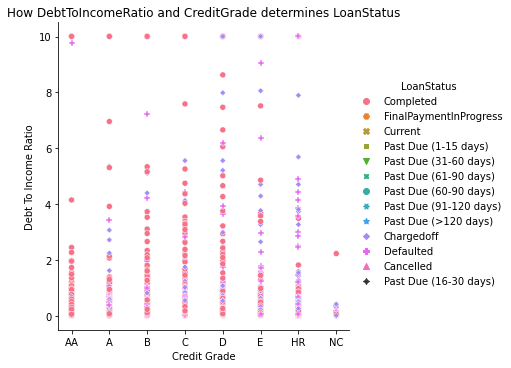

In [9]:
creditGrades=['AA','A','B','C','D','E','HR','NC']
grades = pd.api.types.CategoricalDtype(ordered=True,categories=creditGrades)
loan['CreditGrade'] = loan['CreditGrade'].astype(grades)

sb.relplot(data=loan,x='CreditGrade',y='DebtToIncomeRatio',style='LoanStatus',hue='LoanStatus',hue_order=loan_status_order2);
plt.title('How DebtToIncomeRatio and CreditGrade determines LoanStatus')
plt.ylabel('Debt To Income Ratio')
plt.xlabel('Credit Grade');


## The Effect of BorrowerRate and LoanOriginalAmount on LoanStatus
##### * Borrowers with a relatively lower loan (less than $5000) are completing their payments compared to those a higher loan amount.

##### * Also, the higher number of borrowers with BorrowerRate of less than  0.25 are completing their loan or are in the final payment.
##### * Most of the defaulters and charge-off were borrowers who had a loan of over  $5000 or borrowed at a rate higher than 0.25

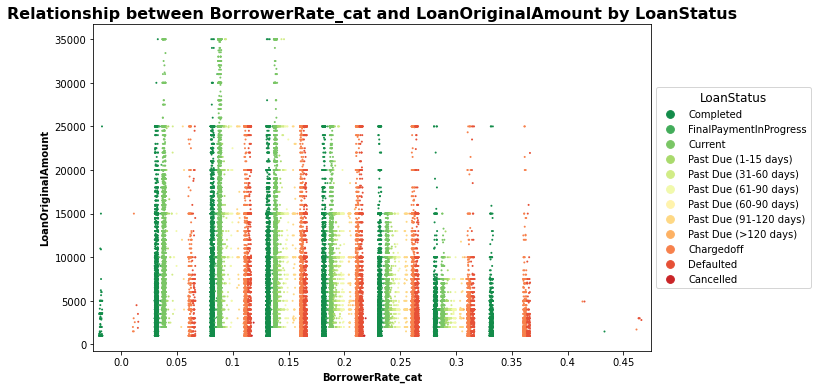

In [6]:
plot_scatter(loan,'BorrowerRate_cat','LoanOriginalAmount','LoanStatus',None,loan_status_order)

## Effect of Term and IncomeRange on LoanOriginalAmount
#### Earners of over 100,000 are the highest borrowers in terms of loan amount.

#### * The LOANORIGINALAMOUNT does not affect the TERM( It is very likely to choosen by the borrower)

#### * Borrowers earning less than 100,000 rarely borrow more than 25000



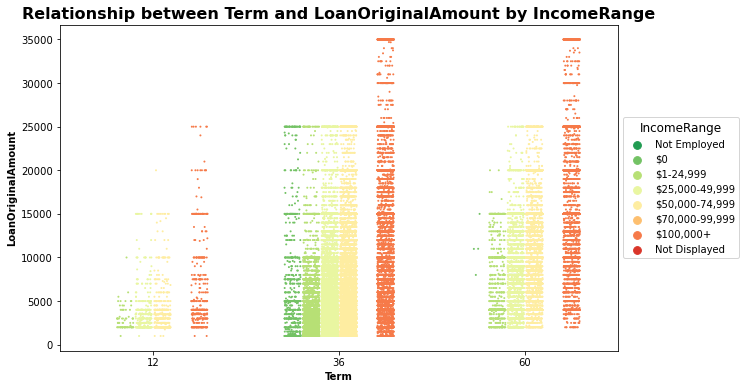

In [8]:
plot_scatter(loan,'Term','LoanOriginalAmount',hue_var='IncomeRange',hue_order=income_order)

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert <Part_II_Filename>.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 